# <font color='PURPLE'>Ciência dos Dados </font>

# <font color='blue'> Machine Learning - Decision Tree em Python</font>


In [ ]:
# Visualizar o Grafo (Decision Tree é Grafo Computacional)
!pip install graphviz 

In [ ]:
### Talvez seja necessário executar esse comando (CMD) para o windows
!conda install python-graphviz

# Documentação em http://www.graphviz.org

In [ ]:
# Importando os módulos
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
# Criando o dataset
instancias = [
    {'Curado': False, 'Cloroquina': 'sim'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': False, 'Cloroquina': 'nao'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': False, 'Cloroquina': 'sim'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': False, 'Cloroquina': 'sim'},
    {'Curado': False, 'Cloroquina': 'sim'},
    {'Curado': False, 'Cloroquina': 'nao'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': True, 'Cloroquina': 'sim'}
]

In [ ]:
# Transformando o Ddicionário em DataFrame
df = pd.DataFrame(instancias)

In [ ]:
df

In [ ]:
# Preparando os dados de treino 
# Transformando Variáveis...Tipo o Case When no Curso de SAS

X_train = [[1] if a else [0] for a in df['Curado']]       
y_train = [1 if d == 'sim' else 0 for d in df['Cloroquina']]
labels = ['Cloroquina']

#OBS: Como o objetivo é mostrar como se constrói uma Árvore de Decisão, não vamos usar dados de TESTE....Só base de de Treino  

In [ ]:
print(X_train)

In [ ]:
print(y_train)

In [ ]:
# Construindo o Classificador Baseado em Entropia (Ganho de Informação)
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
modelo_v1 = DecisionTreeClassifier(max_depth = None, 
                                   max_features = None, 
                                   criterion = 'entropy', 
                                   min_samples_leaf = 1, 
                                   min_samples_split = 2)

In [ ]:
# Apresentando os dados ao Classificador
modelo_v1.fit(X_train, y_train)

## Hiper-parâmetros. 

### Max_Depth

Quando temos muitas variáveis de entrada,  temos que delimitar a profundidade da árvore para evitar o OVERFITING (modelo fica viciado nos dados de treino e só acerta o gabarito...quando passa novos dados ele erra muito).

Para isso, usamos o hiperparâmetro "max_depth", que nosso caso foi usado como default "max_depth=None"  (temos só 1 variável...)

### Max_Features

Por meio desse hiperparâmetro a gente delimita a quantidade de variáveis e faz agrupamento no caso de haver muitas variáveis explicativas

No nosso modelo foi usado o default "max_features=None"...

Eduardo, qual o valor do hiperparâmetro do modelo a gente deve usar?
R: Existem técnicas de "tunagem" de hiperparâmetros como "Grid Search", por exemplo...

In [ ]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = '/content/sample_data/tree_modelo_v1.dot'

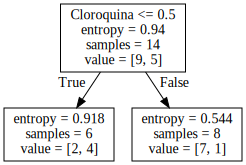

In [ ]:
# Gerando o gráfico da árvore de decisão
export_graphviz(modelo_v1, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

O agrupamento com 9 e 5 foi o que apresentou  MELHOR ENTROPIA, portanto maior ganho de informação. Portanto ele fica no TOPO da hierarquia da Decision Tree.
Isso é exatamente o que o algoritmo faz: Ele percorre os exemplos de dados, faz o cálculo da entropia, e então faz a melhor combinação...o atributo que tem a melhor entropia vai para o TOPO....Então ele vai criando os níveis da Árvore...

In [ ]:
# Construindo o Classificador Baseado no índice Gini
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
modelo_v2 = DecisionTreeClassifier(max_depth = None, 
                                   max_features = None, 
                                   min_samples_leaf = 1, 
                                   min_samples_split = 2)

In [ ]:
# Apresentando os dados ao Classificador
modelo_v2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = '/content/sample_data/tree_modelo_v2.dot'

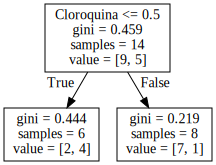

In [ ]:
# Gerando o gráfico da árvore de decisão
export_graphviz(modelo_v2, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

O agrupamento com 9 e 5 foi o que apresentou  MELHOR GINI. Portanto ele fica no TOPO da hierarquia da Decision Tree.Isso é exatamente o que o algoritmo faz: Ele percorre os exemplos de dados, faz o cálculo do maior gini, e então faz a melhor combinação...o atributo que tem o maior gini vai para o TOPO....Então ele vai criando os níveis da Árvore...

# Fim 
# TamoJunto

### Facebook -  Ciência dos Dados - <a href="http://facebook.com/dsacademybr">facebook.com/cienciadosdadosbr</a>

### #**Telegram** - Scripts e Datasets - Comunidade Telegram <a href="https://t.me/cienciadosdados">https://t.me/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>